<a href="https://colab.research.google.com/github/Creatrohit9/-Online-Retail-Customer-Segmentation/blob/main/Deep_learning_basics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) =keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
#image pixel value
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

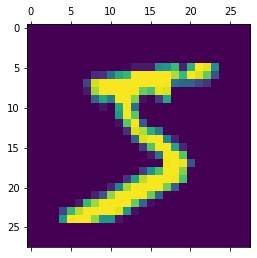

In [6]:
#image plot
plt.matshow(X_train[0])

In [7]:
y_train[2]

4

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
#scaling for increasing accuracy of the model
X_train=X_train/255
X_test=X_test/255

In [10]:
X_train.reshape(len(X_train),28*28)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X_train_flat=X_train.reshape(len(X_train),28*28)
X_test_flat=X_test.reshape(len(X_test),28*28)

In [12]:
X_test_flat.shape

(10000, 784)

In [13]:
#start building neural network
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
model.fit(X_train_flat,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4707 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3037 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2831 - accuracy: 0.9198
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9254


In [14]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2678 - accuracy: 0.9248


[0.26783689856529236, 0.9247999787330627]

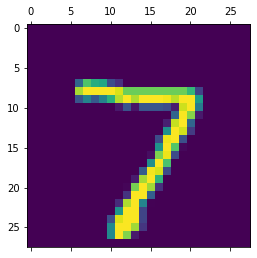

In [15]:
plt.matshow(X_test[0])

In [16]:
y_pred=model.predict(X_test_flat)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([1.5743639e-02, 3.5072833e-07, 4.7171339e-02, 9.5334011e-01,
       1.7882712e-03, 8.4418878e-02, 2.2659574e-06, 9.9983895e-01,
       8.2018226e-02, 6.8337530e-01], dtype=float32)

In [17]:
y_pred_label=[np.argmax(i) for i in y_pred]

In [21]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    1,    0,    4,    9,    4,    1,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   4,   11,  929,   12,    6,    3,   12,   12,   39,    4],
       [   2,    0,   22,  917,    0,   23,    3,   12,   22,    9],
       [   1,    2,    6,    1,  891,    0,   13,    5,    7,   56],
       [   9,    3,    3,   37,    7,  764,   17,    8,   36,    8],
       [   7,    3,    7,    1,    7,    9,  919,    2,    3,    0],
       [   1,    6,   22,    5,    2,    0,    0,  954,    3,   35],
       [   6,   10,    8,   16,    9,   23,    9,   12,  865,   16],
       [   9,    7,    2,    9,   16,    4,    0,   22,    7,  933]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

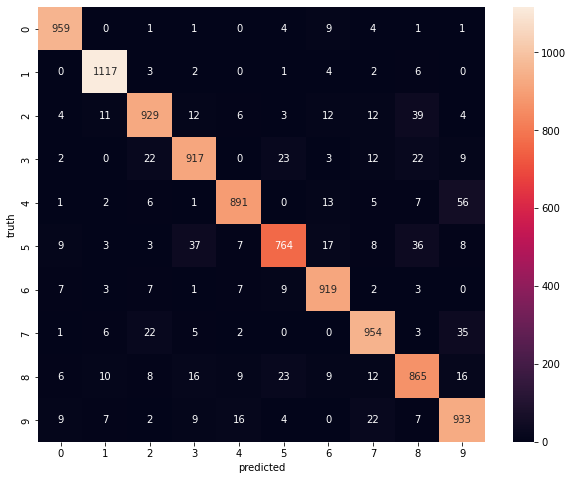

In [24]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")

In [30]:
#introduce one hiddin layer
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
# model.fit(X_train_flat,y_train,epochs=5)
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2691 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1231 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0868 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0514 - accuracy: 0.9844


In [27]:
model.evaluate(X_test_flat,y_test) #we can observe increment in accuracy

313/313 [==============================] - 2s 4ms/step - loss: 0.0861 - accuracy: 0.9737


[0.08613190799951553, 0.9736999869346619]

313/313 [==============================] - 1s 3ms/step


Text(69.0, 0.5, 'truth')

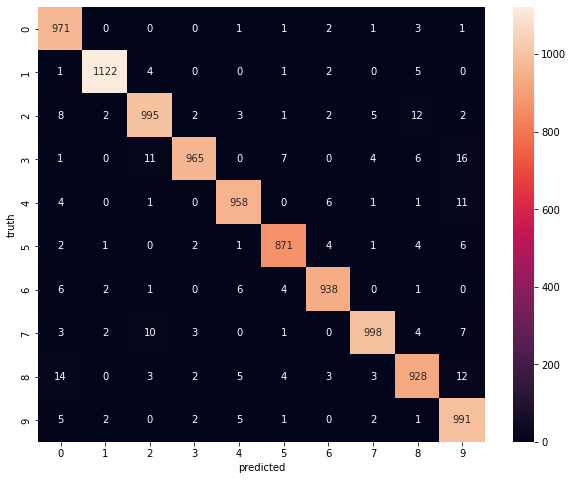

In [28]:
y_pred=model.predict(X_test_flat)
y_pred[0]
y_pred_label=[np.argmax(i) for i in y_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")
#you can identify reduction in the error through heat map